In [1]:
#this ensures that plots produced by matplotlib (and seaborn, which is built off of matplotlib) are displayed inline in the ipython interface, rather than opening a new window
%matplotlib inline

import numpy as np
import csv
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab
import scipy
import scipy.stats
from scipy.stats import ttest_ind
import math
import pandas as pd
import re
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#increase the number of columns displayed to 30
pd.options.display.max_columns = 30

#format the visual style of seaborn factor plots; context sets the font size larger, suitable for talks
sns.set(style = 'ticks', context = 'talk')

#indicates where the new counterscreen data's metadata start
ROW_NEW_DATA = 32

final_analysis_output_folder = '/Users/markfang/Dropbox/UCSD Grad work/RNA-Yeo Lab/counterscreen metadata and analyses/final analysis outputs'

In [3]:
#add the amount of SG per cell as a new column to the dataframe
def sg_per_cell(dataset, granule_area_loc, nuclear_area_loc):
    dataset = dataset.rename(columns = {granule_area_loc: 'qualified granule area'})
    dataset = dataset.rename(columns = {nuclear_area_loc: 'qualified nuclear area'})
    #print dataset
    dataset['SG amount per cell'] = dataset.apply(calc_sg_per_cell, axis = 1)
    return dataset

#calculate the amount of SG per cell as follows: divide the area of puncta (located within cell boundaries in the image)
#by the area of the nucleus (DAPI signal that is located within cell boundaries in the image)
def calc_sg_per_cell(dataset):
    return float(dataset['qualified granule area']) / float(dataset['qualified nuclear area'])

def exp_date(dataset, exp_date):
    dataset['experiment date'] = exp_date
    return dataset

def cell_type(dataset, cell_type, cell_type_df):
    dataset['cell type'] = cell_type
    #dataset['cell type, full'] = '{}'.format(cell_type_df['{}'.format(cell_type)])
    
    #dataframe.values() converts a dataframe to a numpy array if possible
    dataset['cell type, full'] = cell_type_df['{}'.format(cell_type)].values[0]
    #dataset['cell type, full'] = cell_type_df['{}'.format(cell_type)].str[:]
    return dataset

def exp_type(dataset, exp_type, exp_type_df):
    dataset['experiment type'] = exp_type
    #dataset['experiment type, full'] = '{}'.format(exp_type_df['{}'.format(exp_type)])
    
    dataset['experiment type, full'] = exp_type_df['{}'.format(exp_type)].values[0]
    return dataset

def plate_layout(dataset, plate_layout, plate_layout_df):
    #print plate_layout_df
    dataset['plate layout'] = plate_layout_df['{}'.format(plate_layout)]
    #dataset['compound name'] = '{}'.format(plate_layout_df['{}'.format(plate_layout)])
    return dataset

def compound_list(dataset, compound_list, compound_list_df):
    #print dataset
    cmpd_id = []
    
    for index, row in dataset.iterrows():
        x = compound_list_df['{}'.format(compound_list)]
        cmpd_number = int(row['plate layout']) - 1
        #print cmpd_id
        #print x[cmpd_id]
        cmpd_id.append(x[cmpd_number])
    #print cmpd_id
    dataset['compound name'] = cmpd_id
    return dataset
    
def concentration_layout(dataset, concentration_layout, concentration_layout_df):
    dataset['compound concentration uM'] = concentration_layout_df['{}'.format(concentration_layout)]
    return dataset

In [4]:
#path of the folder containing the conterscreening metadata
counterscreen_metadata_folder = '/Users/markfang/Dropbox/UCSD Grad work/RNA-Yeo Lab/counterscreen metadata and analyses'

#the {} is replaced by the argument in the string function .format()
#metadata = pd.read_csv('{}/counterscreen metadata test.csv'.format(counterscreen_metadata_folder))
metadata = pd.read_csv('{}/counterscreen metadata.csv'.format(counterscreen_metadata_folder))

cell_types = pd.read_csv('{}/counterscreen metadata cell types.csv'.format(counterscreen_metadata_folder))

experiment_types = pd.read_csv('{}/counterscreen metadata experiment types.csv'.format(counterscreen_metadata_folder))

plate_layouts = pd.read_csv('{}/counterscreen metadata plate layouts.csv'.format(counterscreen_metadata_folder))

concentration_layouts = pd.read_csv('{}/counterscreen metadata concentration layouts.csv'.format(counterscreen_metadata_folder))

compound_lists = pd.read_csv('{}/counterscreen metadata compound lists.csv'.format(counterscreen_metadata_folder))



In [5]:
#metadata

In [6]:
#to analyze only newly generated raw data
#metadata = metadata.ix[ROW_NEW_DATA:, :]

In [7]:
#metadata


In [8]:
#check the data type of each column
#print metadata.dtypes

In [9]:
#cell_types


In [10]:
#print cell_types.dtypes


In [11]:
#experiment_types


In [12]:
# print experiment_types.dtypes

In [13]:
# plate_layouts

In [14]:
# print plate_layouts.dtypes

In [15]:
# concentration_layouts

In [16]:
# print concentration_layouts.dtypes

In [17]:
# compound_lists

In [18]:
# print compound_lists.dtypes

In [19]:
aggregated_dataset = pd.DataFrame()

#iterrows() iterates over each row of a dataframe
for index, row in metadata.iterrows():
    dataset = pd.read_csv('{}/{}'.format(row['folder path'], row['file path']), header = None)
        
    #dataframe.ix allows slicing of a dataframe
    dataset = dataset.ix[4:, :]
    
    #dropping the old index and resetting the row indices after slicing
    #ensures that when additional columns containing information about cell type, exp type
    #plate layout, etc. are added, they line up with the right rows
    dataset = dataset.reset_index(drop = True)
    
    #dataset[1] = dataset[row['qualified nuclear area column']]
    
    dataset = sg_per_cell(dataset, row['qualified granule area column'], row['qualified nuclear area column'])
     
    dataset = exp_date(dataset, row['date'])
    
    dataset = cell_type(dataset, row['cell type'], cell_types)
    
    dataset = exp_type(dataset, row['experiment type'], experiment_types)
    
    dataset = plate_layout(dataset, row['plate layout'], plate_layouts)
        
    dataset = compound_list(dataset, row['compound list'], compound_lists)
    
    dataset = concentration_layout(dataset, row['concentration layout'], concentration_layouts)
            
    aggregated_dataset = aggregated_dataset.append(dataset)

print aggregated_dataset.count()

print aggregated_dataset.dtypes


0                            9200
1                            9200
2                            8734
3                            9176
4                            9176
5                            9143
6                            9143
7                            5727
9                            5716
SG amount per cell           9130
cell type                    9200
cell type, full              9200
compound concentration uM    9200
compound name                9200
experiment date              9200
experiment type              9200
experiment type, full        9200
plate layout                 9200
qualified granule area       9131
qualified nuclear area       9183
dtype: int64
0                             object
1                             object
2                             object
3                             object
4                             object
5                             object
6                             object
7                             object
9          

In [20]:
#the astype() function is needed to change the type from object to float, enabling proper graphing
#of qualified nuclear area in seaborn later on
aggregated_dataset[['qualified nuclear area']] = aggregated_dataset[['qualified nuclear area']].astype(float)

print aggregated_dataset.dtypes

0                             object
1                             object
2                             object
3                             object
4                             object
5                             object
6                             object
7                             object
9                             object
SG amount per cell           float64
cell type                      int64
cell type, full               object
compound concentration uM    float64
compound name                 object
experiment date                int64
experiment type               object
experiment type, full         object
plate layout                 float64
qualified granule area        object
qualified nuclear area       float64
dtype: object


In [21]:
aggregated_dataset

,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
0,A - 1,Summary,NaN,151919.083,239.58,6154.575,444.48,NaN,NaN,0.092448,1,HEK293xT,100.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,6008.553,64994.130
1,B - 1,Summary,NaN,85589.118,238.21,2103.389,462.17,NaN,NaN,0.066529,1,HEK293xT,40.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,2097.981,31535.022
2,C - 1,Summary,NaN,127390.641,240.01,6013.961,463.97,NaN,NaN,0.117869,1,HEK293xT,10.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,5879.587,49882.263
3,D - 1,Summary,NaN,222973.352,241.93,8049.539,472.14,NaN,NaN,0.086243,1,HEK293xT,4.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,7944.286,92114.782
4,E - 1,Summary,NaN,92305.318,236.58,4931.065,443.56,NaN,NaN,0.084506,1,HEK293xT,1.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,4858.262,57489.991
5,F - 1,Summary,NaN,203596.049,219.01,4137.718,411.62,NaN,NaN,0.055438,1,HEK293xT,100.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,4079.06,73578.668
6,G - 1,Summary,NaN,115439.682,216.46,6604.707,392.76,NaN,NaN,0.149875,1,HEK293xT,40.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6460.765,43107.821
7,H - 1,Summary,NaN,165390.589,224.05,6692.071,419.17,NaN,NaN,0.108886,1,HEK293xT,10.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6574.338,60378.406
8,I - 1,Summary,NaN,97194.782,230.23,3464.185,427.74,NaN,NaN,0.077422,1,HEK293xT,4.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,3395.958,43862.894
9,J - 1,Summary,NaN,259767.678,244.51,6620.932,469.48,NaN,NaN,0.066718,1,HEK293xT,1.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6548.129,98145.800


In [22]:
#with open ('{}/151120 test output.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    aggregated_dataset.to_csv('{}/151120 test output.csv'.format(counterscreen_metadata_folder))


In [23]:
# with open ('{}/151120 test output 2.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    aggregated_dataset.to_csv('{}/151120 test output 2.csv'.format(counterscreen_metadata_folder))


In [24]:
# remove all wells in which there was no data (e.g. due to cells falling off in that well) by removing rows
# in which the value under the 'SG amount per cell' column is NaN
aggregated_dataset = aggregated_dataset.dropna(subset = ['SG amount per cell'])

In [25]:
#with open ('{}/151120 test output 3.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    aggregated_dataset.to_csv('{}/151120 test output 3.csv'.format(counterscreen_metadata_folder))


In [26]:
aggregated_dataset = aggregated_dataset.reset_index(drop = True)

aggregated_dataset

,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
0,A - 1,Summary,NaN,151919.083,239.58,6154.575,444.48,NaN,NaN,0.092448,1,HEK293xT,100.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,6008.553,64994.130
1,B - 1,Summary,NaN,85589.118,238.21,2103.389,462.17,NaN,NaN,0.066529,1,HEK293xT,40.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,2097.981,31535.022
2,C - 1,Summary,NaN,127390.641,240.01,6013.961,463.97,NaN,NaN,0.117869,1,HEK293xT,10.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,5879.587,49882.263
3,D - 1,Summary,NaN,222973.352,241.93,8049.539,472.14,NaN,NaN,0.086243,1,HEK293xT,4.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,7944.286,92114.782
4,E - 1,Summary,NaN,92305.318,236.58,4931.065,443.56,NaN,NaN,0.084506,1,HEK293xT,1.000000,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,4858.262,57489.991
5,F - 1,Summary,NaN,203596.049,219.01,4137.718,411.62,NaN,NaN,0.055438,1,HEK293xT,100.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,4079.06,73578.668
6,G - 1,Summary,NaN,115439.682,216.46,6604.707,392.76,NaN,NaN,0.149875,1,HEK293xT,40.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6460.765,43107.821
7,H - 1,Summary,NaN,165390.589,224.05,6692.071,419.17,NaN,NaN,0.108886,1,HEK293xT,10.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6574.338,60378.406
8,I - 1,Summary,NaN,97194.782,230.23,3464.185,427.74,NaN,NaN,0.077422,1,HEK293xT,4.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,3395.958,43862.894
9,J - 1,Summary,NaN,259767.678,244.51,6620.932,469.48,NaN,NaN,0.066718,1,HEK293xT,1.000000,GSK3B inhibitor (SB415286),140801,1a,"dose response (1:100 to 1:10000 dilution, with...",9,6548.129,98145.800


In [27]:
aggregated_dataset.count()

0                            9130
1                            9130
2                            8681
3                            9130
4                            9130
5                            9130
6                            9130
7                            5716
9                            5716
SG amount per cell           9130
cell type                    9130
cell type, full              9130
compound concentration uM    9130
compound name                9130
experiment date              9130
experiment type              9130
experiment type, full        9130
plate layout                 9130
qualified granule area       9130
qualified nuclear area       9130
dtype: int64

In [28]:
#aggregated_dataset.dtypes

In [29]:
#sort data so that data points collected from the same experimental replicate will be listed contiguously
dataset_sortedby_exp_repl = aggregated_dataset.sort(['cell type', 'experiment type', 'experiment date', 'compound name', 'compound concentration uM'])

dataset_sortedby_exp_repl.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
4,E - 1,Summary,NaN,92305.318,236.58,4931.065,443.56,NaN,NaN,0.084506,1,HEK293xT,1,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,4858.262,57489.991
3,D - 1,Summary,NaN,222973.352,241.93,8049.539,472.14,NaN,NaN,0.086243,1,HEK293xT,4,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,7944.286,92114.782
2,C - 1,Summary,NaN,127390.641,240.01,6013.961,463.97,NaN,NaN,0.117869,1,HEK293xT,10,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,5879.587,49882.263
1,B - 1,Summary,NaN,85589.118,238.21,2103.389,462.17,NaN,NaN,0.066529,1,HEK293xT,40,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,2097.981,31535.022
0,A - 1,Summary,NaN,151919.083,239.58,6154.575,444.48,NaN,NaN,0.092448,1,HEK293xT,100,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,6008.553,64994.130
24,E - 5,Summary,NaN,151048.356,221.37,4074.068,461.17,NaN,NaN,0.058674,1,HEK293xT,1,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,4048.691,69003.299
23,D - 5,Summary,NaN,192018.259,224.13,4577.034,420.63,NaN,NaN,0.059869,1,HEK293xT,4,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,4551.241,76019.864
22,C - 5,Summary,NaN,113460.267,228.79,497.558,462.24,NaN,NaN,0.011966,1,HEK293xT,10,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,485.909,40606.302
21,B - 5,Summary,NaN,367677.844,239.6,738.017,459.97,NaN,NaN,0.005470,1,HEK293xT,40,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,725.12,132568.405
20,A - 5,Summary,NaN,98766.915,245.59,848.261,426.26,NaN,NaN,0.020468,1,HEK293xT,100,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,838.277,40955.758


In [30]:
#with open ('{}/151120 test output experimental replicates.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    dataset_sortedby_exp_repl.to_csv('{}/151120 test output experimental replicates.csv'.format(counterscreen_metadata_folder))


In [31]:
# #set seaborn display style to talk sized font for ease of reading/publishing quality
# sns.set(style = 'ticks', context = 'talk')

# #factorplot() is a subtype of seaborn's Facetplot, which plots multiple subplots in a single conglomerate plot
# #x = gives the x axis labels
# #y = gives the y axis labels
# #col = gives the organization of the subplots by columns
# #row = gives the organization of the subplots by rows
# #hue = gives separation of different subsets of data by color (3rd dimension after x and y axes)
# #kind = bar means plot bar graphs/histograms
# g = sns.factorplot(x = 'compound name', y = 'SG amount per cell', col = 'cell type', hue = 'experiment date', row = 'experiment type', data = dataset_sortedby_exp_repl, kind = 'bar')
# #g.savefig('asdfasdf.pdf')
# g.set_xticklabels(rotation=90)


In [ ]:
dataset_sortedby_exp_repl_dose = dataset_sortedby_exp_repl.loc[dataset_sortedby_exp_repl['experiment type'].str.startswith('1')]
dataset_sortedby_exp_repl_dose.head()

In [ ]:
dose_dataset_with_no_tx_dupl = pd.DataFrame()
for name, df in dataset_sortedby_exp_repl_dose.groupby(['cell type', 'experiment type', 'experiment date']):
    df.loc[~df['compound name'].str.startswith('no tx'), 'treatment'] = 'Compound'
    treatment_df = df.groupby('treatment').get_group('Compound')
    
    df.loc[df['compound name'].str.startswith('no tx'), 'treatment'] = 'No Compound'
    no_treatment_df = df.groupby('treatment').get_group('No Compound')
    
    
#     treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
#     #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
#     no_treatment_df = df.groupby('compound name').get_group('no tx')
    
#     treatment_df['treatment'] = 'Compound'
    
#     #no_treatment_copy = no_treatment.copy()
    
#     #no_treatment_df['compound name'] = name
    
#     no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        #no_treatment_df['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        #df_no_tx_dupl = pd.concat([no_treatment_df_copy, df1], ignore_index = True)

        dose_dataset_with_no_tx_dupl = dose_dataset_with_no_tx_dupl.append(df_no_tx_dupl)

#dose_dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

dose_dataset_with_no_tx_dupl

In [ ]:
ttest_dose_dataset_with_no_tx_dupl = pd.DataFrame()
dfs = pd.Series()
for name, df in dataset_sortedby_exp_repl_dose.groupby(['cell type, full', 'experiment type, full', 'experiment date']):
    df.loc[~df['compound name'].str.startswith('no tx'), 'treatment'] = 'Compound'
    treatment_df = df.groupby('treatment').get_group('Compound')
    
    df.loc[df['compound name'].str.startswith('no tx'), 'treatment'] = 'No Compound'
    no_treatment_df = df.groupby('treatment').get_group('No Compound')
    
    
#     treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
#     #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
#     no_treatment_df = df.groupby('compound name').get_group('no tx')
    
#     treatment_df['treatment'] = 'Compound'
    
#     #no_treatment_copy = no_treatment.copy()
    
#     #no_treatment_df['compound name'] = name
    
#     no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        #no_treatment_df['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        #df_no_tx_dupl = pd.concat([no_treatment_df_copy, df1], ignore_index = True)
        
        for name2, df2 in df_no_tx_dupl.groupby(['compound concentration uM']):
            #perform ttest
            has_cmpd = df2[df2['treatment'] == 'Compound']
            has_no_cmpd = df2[df2['treatment'] == 'No Compound']
            
            #equal_var = False enables Welch's t test, a variant of Student's t test that is better for comparing
            #2 pop whether the means are equal, assuming unequal pop sizes and unequal variances
            ttest_result = ttest_ind(has_cmpd['SG amount per cell'], has_no_cmpd['SG amount per cell'], equal_var = False)
            
            #print name[0]
            #print ttest_result[0]
            dfs['cell type, full'] = name[0]
            #print dfs['cell type, full']
            dfs['experiment type, full'] = name[1]
            dfs['experiment date'] = name[2]
            dfs['compound name'] = name1
            dfs['compound concentration uM'] = name2
            dfs['t stat'] = ttest_result[0]
            dfs['p value'] = ttest_result[1]
            if ttest_result[1] < 0.005:
                dfs['sig level'] = '***'
            elif ttest_result[1] < 0.01:
                dfs['sig level'] = '**'
            elif ttest_result[1] < 0.05:
                dfs['sig level'] = '*'
            else:
                dfs['sig level'] = ''
#             dfs[0] = name[0]
#             #print dfs['cell type, full']
#             dfs[1] = name[1]
#             dfs[2] = name[2]
#             dfs[3] = name1
#             dfs[4] = name2
#             dfs[5] = ttest_result[0]
#             dfs[6] = ttest_result[1]
            
            #print dfs
            
            ttest_dose_dataset_with_no_tx_dupl = ttest_dose_dataset_with_no_tx_dupl.append(dfs, ignore_index= True)

#dose_dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

ttest_dose_dataset_with_no_tx_dupl

In [ ]:

# with open ('{}/151222 test output.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#     dose_dataset_with_no_tx_dupl.to_csv('{}/151222 test output.csv'.format(counterscreen_metadata_folder))

In [ ]:

# with open ('{}/151222 exp repl dose t tests.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#     ttest_dose_dataset_with_no_tx_dupl.to_csv('{}/151222 exp repl dose t tests.csv'.format(counterscreen_metadata_folder))

In [ ]:
for experiment_metadata, df in dose_dataset_with_no_tx_dupl.groupby(['cell type, full', 'experiment type', 'experiment date']):    
    #aspect will be used to change the aspect ratio/width of the graphs
    #aspect = len(df.groupby(categories).size())/10.
    
    #g = sns.FacetGrid(df, col = 'compound name', row = 'cell type, full', hue = 'treatment', hue_order = ['No Compound', 'Compound'])
    g = sns.FacetGrid(df, col = 'compound name', col_wrap = 3, hue = 'treatment', hue_order = ['No Compound', 'Compound'], aspect = 1.5)

    #g = (g.map(sns.pointplot, 'compound concentration uM', 'SG amount per cell'))
    
    #graphing nuclear area for pseudo-viability assessment
    g = (g.map(sns.pointplot, 'compound concentration uM', 'qualified nuclear area'))
    
    g.savefig('{}/{} {}.png'.format(counterscreen_metadata_folder, experiment_metadata[2], experiment_metadata[0]))

In [32]:
#the ~ character means NOT; in other words here we want a slice using .loc for all rows that do NOT
#start with '1' as their key under the 'experiment type' index; these are the non-dose response counterscreen data
dataset_sortedby_exp_repl_nondose = dataset_sortedby_exp_repl.loc[~dataset_sortedby_exp_repl['experiment type'].str.startswith('1')]

dataset_sortedby_exp_repl_nondose.head()

,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
5071,E - 9,Summary,570384.03,815136.358,225.28,19255.409,585.64,NaN,NaN,0.031169,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,17746.511,569367.697
5072,E - 10,Summary,94209.85,165796.623,231.37,2779.003,690.38,NaN,NaN,0.027113,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,2554.353,94209.850
5083,F - 9,Summary,184961.756,277405.608,234.92,6630.916,663.3,NaN,NaN,0.033304,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,6159.984,184961.756
5084,F - 10,Summary,73743.828,120537.571,226.4,1768.91,642.93,NaN,NaN,0.023028,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,1698.187,73743.828
5017,A - 3,Summary,1301323.268,1612481.692,247.9,39040.409,580.31,NaN,NaN,0.027395,1,HEK293xT,10,A112,150914,2,compound added after arsenite - 2,2,35499.261,1295809.361


In [33]:
dataset_with_no_tx_dupl = pd.DataFrame()
for name, df in dataset_sortedby_exp_repl_nondose.groupby(['cell type', 'experiment type', 'experiment date']):

    df.loc[~df['compound name'].str.startswith('no tx'), 'treatment'] = 'Compound'
    treatment_df = df.groupby('treatment').get_group('Compound')
    
    df.loc[df['compound name'].str.startswith('no tx'), 'treatment'] = 'No Compound'
    no_treatment_df = df.groupby('treatment').get_group('No Compound')
    
    
#     treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
#     #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
#     no_treatment_df = df.groupby('compound name').get_group('no tx')
    
#     treatment_df['treatment'] = 'Compound'
    
#     #no_treatment_copy = no_treatment.copy()
    
#     #no_treatment_df['compound name'] = name
    
#     no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        dataset_with_no_tx_dupl = dataset_with_no_tx_dupl.append(df_no_tx_dupl)

#dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

dataset_with_no_tx_dupl

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area,treatment
0,E - 9,Summary,570384.03,815136.358,225.28,19255.409,585.64,NaN,NaN,0.031169,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,17746.511,569367.697,Compound
1,E - 10,Summary,94209.85,165796.623,231.37,2779.003,690.38,NaN,NaN,0.027113,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,2554.353,94209.850,Compound
2,F - 9,Summary,184961.756,277405.608,234.92,6630.916,663.3,NaN,NaN,0.033304,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,6159.984,184961.756,Compound
3,F - 10,Summary,73743.828,120537.571,226.4,1768.91,642.93,NaN,NaN,0.023028,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,1698.187,73743.828,Compound
4,E - 11,Summary,140196.934,231989.717,200.51,4853.27,580.26,NaN,NaN,0.033244,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,4660.654,140196.934,No Compound
5,E - 12,Summary,861351.42,1177019.483,255.87,34006.587,588.29,NaN,NaN,0.036378,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,31255.042,859173.980,No Compound
6,F - 11,Summary,14736.618,61404.724,173.25,613.211,532.46,NaN,NaN,0.040990,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,604.059,14736.618,No Compound
7,F - 12,Summary,82054.21,137427.5,223.22,2090.908,626.31,NaN,NaN,0.023926,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,1963.191,82054.210,No Compound
8,G - 5,Summary,839435.158,1149893.423,243.67,35196.4,583.12,NaN,NaN,0.038683,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,21,32386.612,837238.997,No Compound
9,G - 6,Summary,431475.921,599515.299,245.61,14158.768,623.57,NaN,NaN,0.029981,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,21,12929.434,431250.023,No Compound


In [ ]:
ttest_nondose_dataset_with_no_tx_dupl = pd.DataFrame()
dfs = pd.Series()
for name, df in dataset_sortedby_exp_repl_nondose.groupby(['cell type, full', 'experiment type, full', 'experiment date']):
    df.loc[~df['compound name'].str.startswith('no tx'), 'treatment'] = 'Compound'
    treatment_df = df.groupby('treatment').get_group('Compound')
    
    df.loc[df['compound name'].str.startswith('no tx'), 'treatment'] = 'No Compound'
    no_treatment_df = df.groupby('treatment').get_group('No Compound')
    
    
#     treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
#     #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
#     no_treatment_df = df.groupby('compound name').get_group('no tx')
    
#     treatment_df['treatment'] = 'Compound'
    
#     #no_treatment_copy = no_treatment.copy()
    
#     #no_treatment_df['compound name'] = name
    
#     no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        #no_treatment_df['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        #df_no_tx_dupl = pd.concat([no_treatment_df_copy, df1], ignore_index = True)
        
        for name2, df2 in df_no_tx_dupl.groupby(['compound concentration uM']):
            #perform ttest
            has_cmpd = df2[df2['treatment'] == 'Compound']
            has_no_cmpd = df2[df2['treatment'] == 'No Compound']
            
            #equal_var = False enables Welch's t test, a variant of Student's t test that is better for comparing
            #2 pop whether the means are equal, assuming unequal pop sizes and unequal variances
            ttest_result = ttest_ind(has_cmpd['SG amount per cell'], has_no_cmpd['SG amount per cell'], equal_var = False)
            
            #print name[0]
            #print ttest_result[0]
            dfs['cell type, full'] = name[0]
            #print dfs['cell type, full']
            dfs['experiment type, full'] = name[1]
            dfs['experiment date'] = name[2]
            dfs['compound name'] = name1
            dfs['compound concentration uM'] = name2
            dfs['t stat'] = ttest_result[0]
            dfs['p value'] = ttest_result[1]
            if ttest_result[1] < 0.005:
                dfs['sig level'] = '***'
            elif ttest_result[1] < 0.01:
                dfs['sig level'] = '**'
            elif ttest_result[1] < 0.05:
                dfs['sig level'] = '*'
            else:
                dfs['sig level'] = ''
#             dfs[0] = name[0]
#             #print dfs['cell type, full']
#             dfs[1] = name[1]
#             dfs[2] = name[2]
#             dfs[3] = name1
#             dfs[4] = name2
#             dfs[5] = ttest_result[0]
#             dfs[6] = ttest_result[1]
            
            #print dfs
            
            ttest_nondose_dataset_with_no_tx_dupl = ttest_nondose_dataset_with_no_tx_dupl.append(dfs, ignore_index= True)

#dose_dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

ttest_nondose_dataset_with_no_tx_dupl

In [ ]:

with open ('{}/151222 exp repl nondose t tests.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
    ttest_nondose_dataset_with_no_tx_dupl.to_csv('{}/151222 exp repl nondose t tests.csv'.format(counterscreen_metadata_folder))

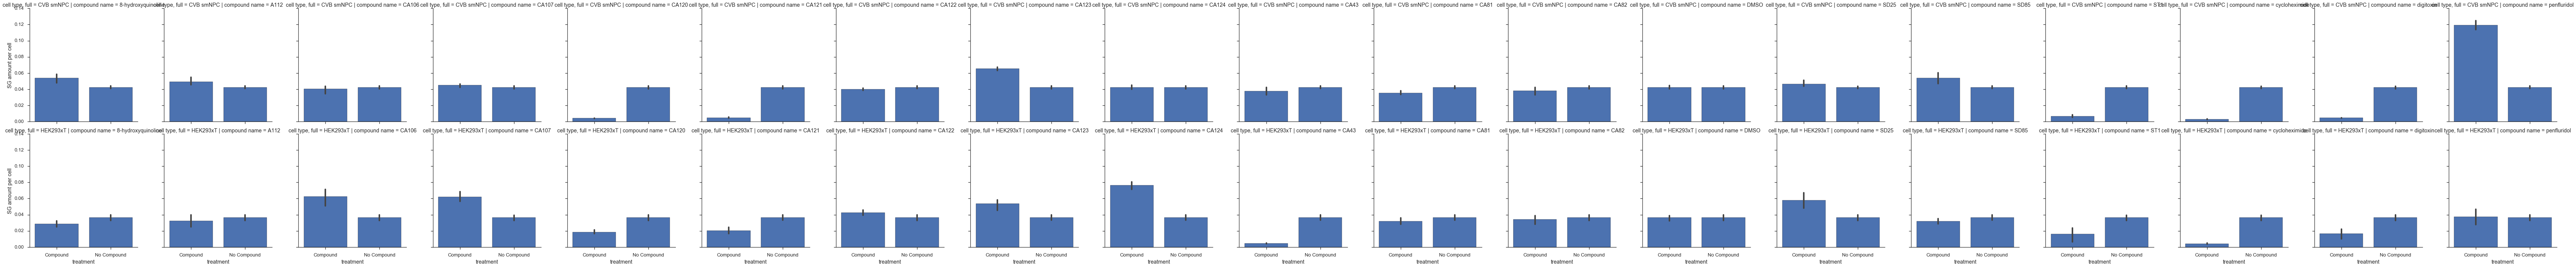

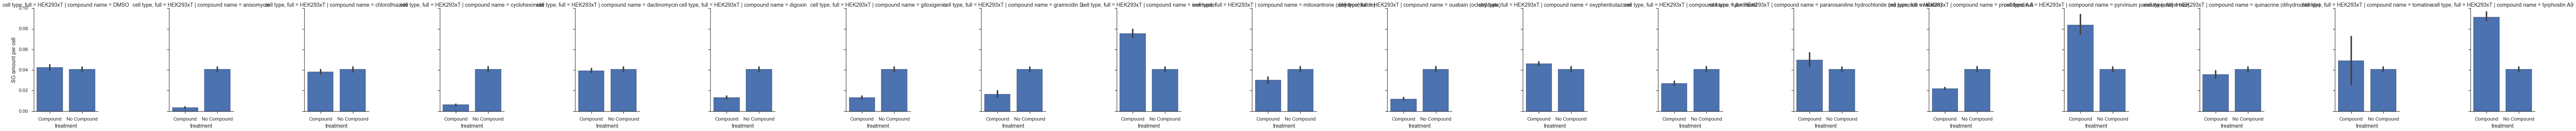

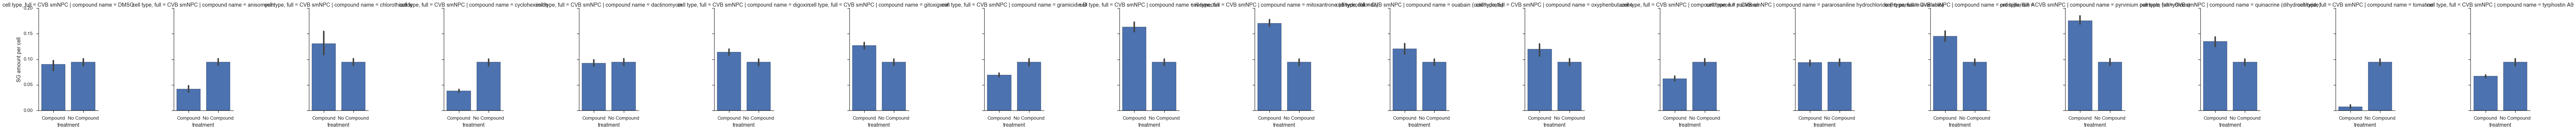

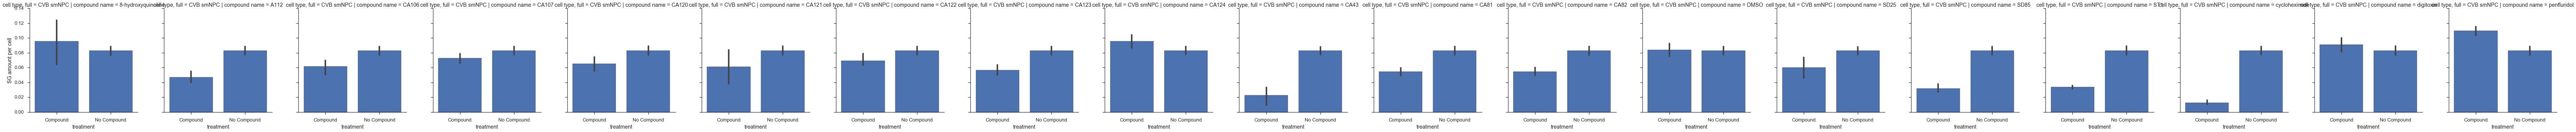

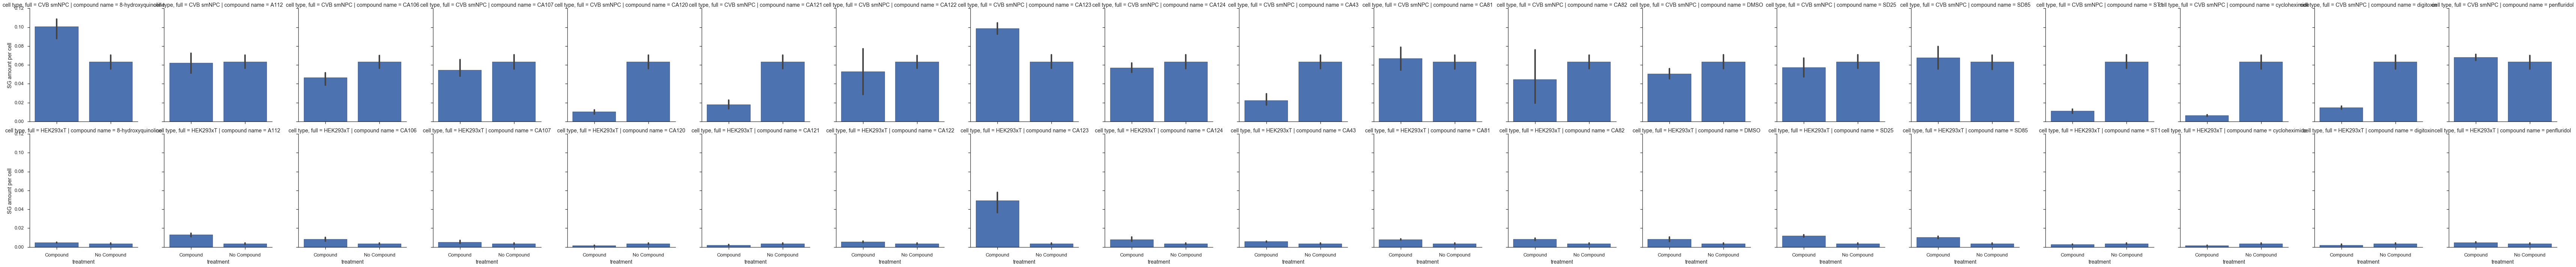

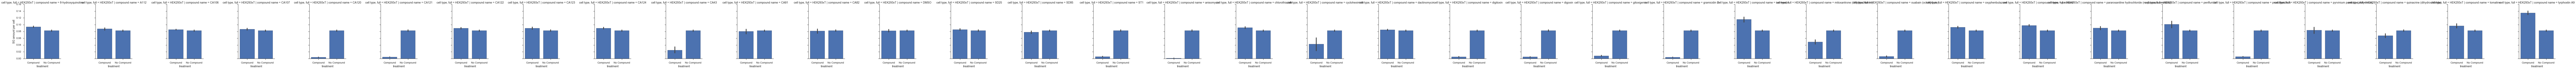

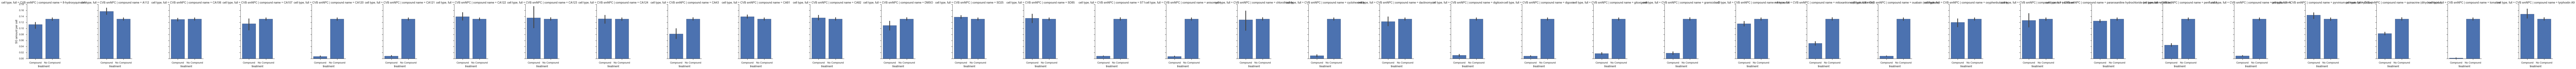

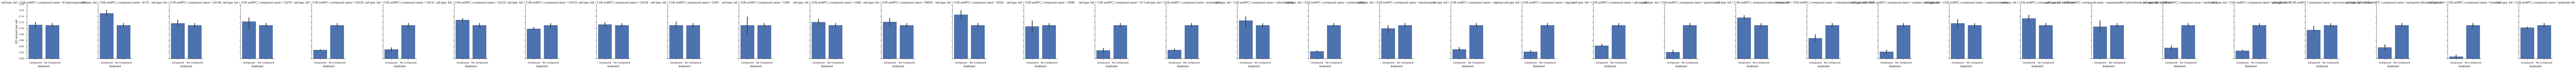

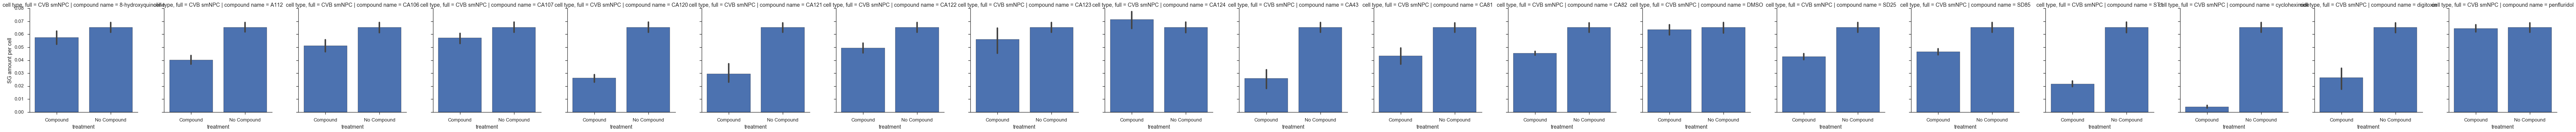

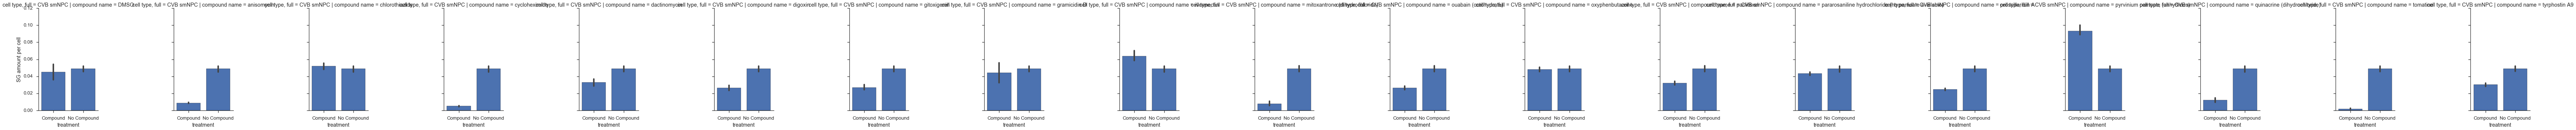

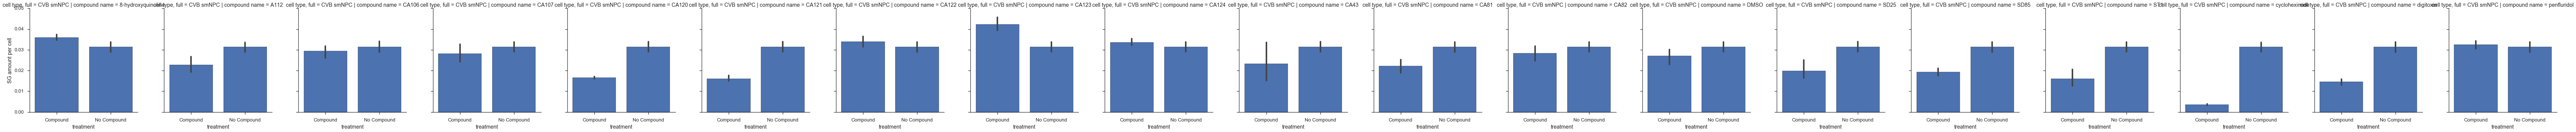

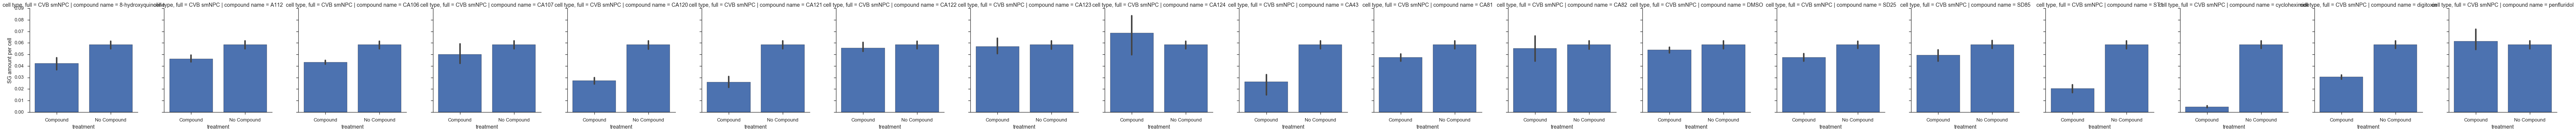

In [35]:
for experiment_metadata, df in dataset_with_no_tx_dupl.groupby(['experiment type, full', 'experiment date']):    
    #aspect will be used to change the aspect ratio/width of the graphs
    #aspect = len(df.groupby(categories).size())/10.
    
    g = sns.factorplot(x = 'treatment', x_order = ['Compound', 'No Compound'], y = 'SG amount per cell', 
                       col = 'compound name', row = 'cell type, full', kind = 'bar', data = df)

    #graphing nuclear area for pseudo-viability assessment
    #g = sns.factorplot(x = 'treatment', x_order = ['Compound', 'No Compound'], y = 'qualified nuclear area', 
    #                   col = 'compound name', row = 'cell type, full', kind = 'bar', data = df)
    
    g.savefig('{}/{} {}.png'.format(counterscreen_metadata_folder, experiment_metadata[1], experiment_metadata[0]))

In [ ]:
# #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
# no_treatment = dataset_sortedby_exp_repl.groupby('compound name').get_group('no tx')
# #print no_treatment

# dfs = []
# for name, df in dataset_sortedby_exp_repl.groupby(['compound name']):
# #     if name == 'no tx':
# #         continue
    
#     #create a new column in the dataframe that denotes whether each row/data point represents a no tx control or not; True if not, False if it is a no tx control
#     df['treatment'] = True
#     no_treatment_copy = no_treatment.copy()
    
#     no_treatment_copy['compound name'] = name
    
#     #create a new column in the dataframe that denotes whether each row/data point represents a no tx control or not; True if not, False if it is a no tx control
#     no_treatment_copy['treatment'] = False
    
#     #attempt to create a copy of the no tx control next to each data point so that we can graph each data point side by side to no tx control
#     #however, this falls short because not all no tx controls go with each experiment
#     #this the below needs work
#     df = pd.concat([df, no_treatment_copy], ignore_index=True)
#     dfs.append(df)
# dataset_with_duplicates = pd.concat(dfs, ignore_index=True)

# print dataset_with_duplicates


In [ ]:
#print (dataset_with_duplicates['treatment'] == True).sum()

#print (dataset_with_duplicates['treatment'] == False).sum()

#can create headers like this using command mode; toggle back and forth with y and m
#can increase size of headers like in html with different number of # signs followed by space followed by header text; alternatively press 1 through 6 during command mode
Remove experiments whose number starst with 1

In [ ]:
# for experiment_date, df in dataset_with_duplicates.groupby('experiment date'):
#     categories = ['compound name', 'cell type', 'experiment type']
    
#     #aspect will be used to change the aspect ratio/width of the graphs
#     aspect = len(df.groupby(categories).size())/10.
    
#     g = sns.factorplot(x='compound name', hue='treatment', y='SG amount per cell', 
#                        col='cell type', row='experiment type', kind='bar', data=df, aspect=aspect)
#     #g.savefig('{}.pdf'.format(experiment_date))

In [ ]:
# #calculate the average for each experimental replicate separately
# #when using groupby, you can specify either column names as done below, or specify the multiindex level e.g. dataframe.groupby(level = 1)
# exp_repl_mean = dataset_sortedby_exp_repl.groupby(['cell type', 'experiment type', 'experiment date', 'compound name', 'compound concentration uM'])['SG amount per cell'].mean()

# exp_repl_mean

# #type(exp_repl_mean)


In [ ]:
# exp_repl_mean = exp_repl_mean.to_frame()

# exp_repl_mean = exp_repl_mean.rename(columns = {'SG amount per cell': 'mean SG per cell'})

# exp_repl_mean

In [ ]:
# #calculate the sample standard deviation for each experimental replicate separately

# exp_repl_stdev = dataset_sortedby_exp_repl.groupby(['cell type', 'experiment type', 'experiment date', 'compound name', 'compound concentration uM'])['SG amount per cell'].std()

# exp_repl_stdev

In [ ]:
# exp_repl_stdev = exp_repl_stdev.to_frame()

# exp_repl_stdev = exp_repl_stdev.rename(columns = {'SG amount per cell': 'stdev SG per cell'})

# exp_repl_stdev

In [ ]:
# #collect replicate datapoints for each experimental replicate separately

# exp_repl_datapoints = dataset_sortedby_exp_repl.groupby(['cell type', 'experiment type', 'experiment date', 'compound name', 'compound concentration uM'])

# exp_repl_collected_datapoints = exp_repl_datapoints['SG amount per cell'].unique()

# exp_repl_collected_datapoints

In [ ]:
# exp_repl_collected_datapoints = exp_repl_collected_datapoints.to_frame()

# exp_repl_collected_datapoints = exp_repl_collected_datapoints.rename(columns = {'SG amount per cell': 'replicate data points'})

# exp_repl_collected_datapoints

In [ ]:
# exp_repl_mean_and_stdev_with_repl_datapoints = exp_repl_mean

# exp_repl_mean_and_stdev_with_repl_datapoints['stdev SG per cell'] = exp_repl_stdev['stdev SG per cell']

# exp_repl_mean_and_stdev_with_repl_datapoints['replicate data points'] = exp_repl_collected_datapoints['replicate data points']

# exp_repl_mean_and_stdev_with_repl_datapoints

In [ ]:
#with open ('{}/151120 experimental replicates mean and sd.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    exp_repl_mean_and_stdev.to_csv('{}/151120 experimental replicates mean and sd.csv'.format(counterscreen_metadata_folder))


In [ ]:
# with open ('{}/151202 experimental replicates mean, sd, and collected replicate datapoints.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    exp_repl_mean_and_stdev_with_repl_datapoints.to_csv('{}/151202 experimental replicates mean, sd, and collected replicate datapoints.csv'.format(counterscreen_metadata_folder))


In [ ]:
# #analyze dose response data
# dose_1a_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('1a', level = 'experiment type', drop_level = False)
# dose_1a_exp_repl

# dose_1b_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('1b', level = 'experiment type', drop_level = False)
# dose_1b_exp_repl

# dose_1c_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('1c', level = 'experiment type', drop_level = False)
# dose_1c_exp_repl

# dose_1d_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('1d', level = 'experiment type', drop_level = False)
# dose_1d_exp_repl

In [ ]:
# #analyze non dose response data
# after_ars_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('2', level = 'experiment type', drop_level = False)
# after_ars_exp_repl

# heat_shock_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('3', level = 'experiment type', drop_level = False)
# heat_shock_exp_repl

# thapsi_4a_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('4a', level = 'experiment type', drop_level = False)
# thapsi_4a_exp_repl

# thapsi_4b_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('4b', level = 'experiment type', drop_level = False)
# thapsi_4b_exp_repl

# thapsi_4c_exp_repl = exp_repl_mean_and_stdev_with_repl_datapoints.xs('4c', level = 'experiment type', drop_level = False)
# thapsi_4c_exp_repl


In [ ]:
# #get the index names of the second lowest level index using dataframe.index.level[],
# #then iterate over the list of index neames of the second lowest level index and each time take slices using
# #dataframe.xs.  taking the slice will still retain all the index labels from all higher index levels
# #generate plots, labeled with:
# #compound name
# #cell type
# #experiment type
# #experiment date
# #p values using t test
# cell_type_index = exp_repl_mean_and_stdev_with_repl_datapoints.index.levels[0]
# experiment_type_index = exp_repl_mean_and_stdev_with_repl_datapoints.index.levels[1]
# experiment_date_index = exp_repl_mean_and_stdev_with_repl_datapoints.index.levels[2]
# compound_name_index = exp_repl_mean_and_stdev_with_repl_datapoints.index.levels[3]
# compound_concentration_index = exp_repl_mean_and_stdev_with_repl_datapoints.index.levels[4]

# exp_data_to_be_graphed = pd.DataFrame

# for names, data_to_be_graphed in exp_repl_mean_and_stdev_with_repl_datapoints.groupby(level=['cell type', 'experiment type', 'experiment date']):
#     #print x
    
# #     exp_data_to_be_graphed = exp_repl_mean_and_stdev_with_repl_datapoints.xs(, level = 'experiment date', drop_level = False)

# #     #exp_data_to_be_graphed = exp_data_to_be_graphed.to_frame()
    
# #     #print exp_data_to_be_graphed.head()
    
# #     y = exp_data_to_be_graphed.index.tolist()
# #     #y = y[1]
# #     print y
    
# #    if '1' in 
        
# #    else:
# #        exp_data_to_be_graphed = exp_repl_mean_and_stdev_with_repl_datapoints.xs(x, level = 'experiment date', drop_level = False)
# #exp_data_to_be_graphed
# #print exp_data_to_be_graphed


# #fig.saveas
# #fig.savefig



In [ ]:
#data_to_be_graphed

In [ ]:
# # Compute Welch's t-test using the descriptive statistics.
# tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
# dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
# pf = 2*stdtr(dof, -np.abs(tf))

In [36]:
#sort data so that data points collected from all biological replicates will be listed contiguously
dataset_sortedby_bio_repl = aggregated_dataset.sort(['cell type', 'experiment type', 'compound name', 'compound concentration uM'])

dataset_sortedby_bio_repl.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
4,E - 1,Summary,NaN,92305.318,236.58,4931.065,443.56,NaN,NaN,0.084506,1,HEK293xT,1,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,4858.262,57489.991
3,D - 1,Summary,NaN,222973.352,241.93,8049.539,472.14,NaN,NaN,0.086243,1,HEK293xT,4,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,7944.286,92114.782
2,C - 1,Summary,NaN,127390.641,240.01,6013.961,463.97,NaN,NaN,0.117869,1,HEK293xT,10,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,5879.587,49882.263
1,B - 1,Summary,NaN,85589.118,238.21,2103.389,462.17,NaN,NaN,0.066529,1,HEK293xT,40,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,2097.981,31535.022
0,A - 1,Summary,NaN,151919.083,239.58,6154.575,444.48,NaN,NaN,0.092448,1,HEK293xT,100,A6,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",1,6008.553,64994.130
24,E - 5,Summary,NaN,151048.356,221.37,4074.068,461.17,NaN,NaN,0.058674,1,HEK293xT,1,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,4048.691,69003.299
23,D - 5,Summary,NaN,192018.259,224.13,4577.034,420.63,NaN,NaN,0.059869,1,HEK293xT,4,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,4551.241,76019.864
22,C - 5,Summary,NaN,113460.267,228.79,497.558,462.24,NaN,NaN,0.011966,1,HEK293xT,10,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,485.909,40606.302
21,B - 5,Summary,NaN,367677.844,239.6,738.017,459.97,NaN,NaN,0.005470,1,HEK293xT,40,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,725.12,132568.405
20,A - 5,Summary,NaN,98766.915,245.59,848.261,426.26,NaN,NaN,0.020468,1,HEK293xT,100,CA43,140801,1a,"dose response (1:100 to 1:10000 dilution, with...",3,838.277,40955.758


In [37]:
#with open ('{}/151120 test output biological replicates.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    dataset_sortedby_bio_repl.to_csv('{}/151120 test output biological replicates.csv'.format(counterscreen_metadata_folder))


In [ ]:
dataset_sortedby_bio_repl_dose = dataset_sortedby_bio_repl.loc[dataset_sortedby_bio_repl['experiment type'].str.startswith('1')]
dataset_sortedby_bio_repl_dose.head()

In [ ]:
dfs = []
for name, df in dataset_sortedby_bio_repl_dose.groupby(['cell type', 'experiment type', 'experiment date']):
    treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
    #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
    no_treatment_df = df.groupby('compound name').get_group('no tx')
    
    treatment_df['treatment'] = 'Compound'
    
    #no_treatment_copy = no_treatment.copy()
    
    #no_treatment_df['compound name'] = name
    
    no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        dfs.append(df_no_tx_dupl)

dose_dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

dose_dataset_with_no_tx_dupl

In [ ]:
for experiment_metadata, df in dose_dataset_with_no_tx_dupl.groupby(['cell type, full', 'experiment type']):    
    #aspect will be used to change the aspect ratio/width of the graphs
    #aspect = len(df.groupby(categories).size())/10.
    
    #g = sns.FacetGrid(df, col = 'compound name', row = 'cell type, full', hue = 'treatment', hue_order = ['No Compound', 'Compound'])
    g = sns.FacetGrid(df, col = 'compound name', col_wrap = 3, hue = 'treatment', hue_order = ['No Compound', 'Compound'], aspect = 1.5)

    g = (g.map(sns.pointplot, 'compound concentration uM', 'SG amount per cell'))
    
    g.savefig('{}/{} {}.png'.format(counterscreen_metadata_folder, experiment_metadata[0], experiment_metadata[1]))

In [38]:
#the ~ character means NOT; in other words here we want a slice using .loc for all rows that do NOT start with '1' as their key under the 'experiment type' index
dataset_sortedby_bio_repl_nondose = dataset_sortedby_bio_repl.loc[~dataset_sortedby_bio_repl['experiment type'].str.startswith('1')]
dataset_sortedby_bio_repl_nondose.head()

,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area
5071,E - 9,Summary,570384.03,815136.358,225.28,19255.409,585.64,NaN,NaN,0.031169,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,17746.511,569367.697
5072,E - 10,Summary,94209.85,165796.623,231.37,2779.003,690.38,NaN,NaN,0.027113,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,2554.353,94209.850
5083,F - 9,Summary,184961.756,277405.608,234.92,6630.916,663.3,NaN,NaN,0.033304,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,6159.984,184961.756
5084,F - 10,Summary,73743.828,120537.571,226.4,1768.91,642.93,NaN,NaN,0.023028,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,1698.187,73743.828
5017,A - 3,Summary,1301323.268,1612481.692,247.9,39040.409,580.31,NaN,NaN,0.027395,1,HEK293xT,10,A112,150914,2,compound added after arsenite - 2,2,35499.261,1295809.361


In [39]:
dfs = []
for name, df in dataset_sortedby_bio_repl_nondose.groupby(['cell type', 'experiment type']):
    #the ~ character means NOT; in other words here we want a slice using .loc for all rows that do NOT start with '1'
    #as their key under the 'experiment type' index
    treatment_df = df.loc[~df['compound name'].str.startswith('no tx')]
    
    #pull out a dataframe consisting of all rows with index key of 'no tx' under the index of 'compound name'
    no_treatment_df = df.groupby('compound name').get_group('no tx')
    
    treatment_df['treatment'] = 'Compound'
    
    #no_treatment_copy = no_treatment.copy()
    
    #no_treatment_df['compound name'] = name
    
    no_treatment_df['treatment'] = 'No Compound'
    
    for name1, df1 in treatment_df.groupby(['compound name']):
        no_treatment_df_copy = no_treatment_df.copy()
        
        #the next statement changes the name of the compound from 'no tx' to the same name as the compound;
        #this way later on during graphing using seaborn, this set of no tx datapoints will be grouped with the
        #datapoints of the compound; however we can still differentiate that these are no tx datapoints
        #because in the 'treatment' column the value is False
        no_treatment_df_copy['compound name'] = name1
        
        #create a copy of the no tx control next to each data point so that we can graph 
        #each data point side by side to no tx control
        df_no_tx_dupl = pd.concat([df1, no_treatment_df_copy], ignore_index = True)
        dfs.append(df_no_tx_dupl)

dataset_with_no_tx_dupl = pd.concat(dfs, ignore_index = True)

dataset_with_no_tx_dupl

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,9,SG amount per cell,cell type,"cell type, full",compound concentration uM,compound name,experiment date,experiment type,"experiment type, full",plate layout,qualified granule area,qualified nuclear area,treatment
0,E - 9,Summary,570384.03,815136.358,225.28,19255.409,585.64,NaN,NaN,0.031169,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,17746.511,569367.697,Compound
1,E - 10,Summary,94209.85,165796.623,231.37,2779.003,690.38,NaN,NaN,0.027113,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,2554.353,94209.850,Compound
2,F - 9,Summary,184961.756,277405.608,234.92,6630.916,663.3,NaN,NaN,0.033304,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,6159.984,184961.756,Compound
3,F - 10,Summary,73743.828,120537.571,226.4,1768.91,642.93,NaN,NaN,0.023028,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,17,1698.187,73743.828,Compound
4,E - 11,Summary,140196.934,231989.717,200.51,4853.27,580.26,NaN,NaN,0.033244,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,4660.654,140196.934,No Compound
5,E - 12,Summary,861351.42,1177019.483,255.87,34006.587,588.29,NaN,NaN,0.036378,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,31255.042,859173.980,No Compound
6,F - 11,Summary,14736.618,61404.724,173.25,613.211,532.46,NaN,NaN,0.040990,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,604.059,14736.618,No Compound
7,F - 12,Summary,82054.21,137427.5,223.22,2090.908,626.31,NaN,NaN,0.023926,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,18,1963.191,82054.210,No Compound
8,G - 5,Summary,839435.158,1149893.423,243.67,35196.4,583.12,NaN,NaN,0.038683,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,21,32386.612,837238.997,No Compound
9,G - 6,Summary,431475.921,599515.299,245.61,14158.768,623.57,NaN,NaN,0.029981,1,HEK293xT,10,8-hydroxyquinoline,150914,2,compound added after arsenite - 2,21,12929.434,431250.023,No Compound


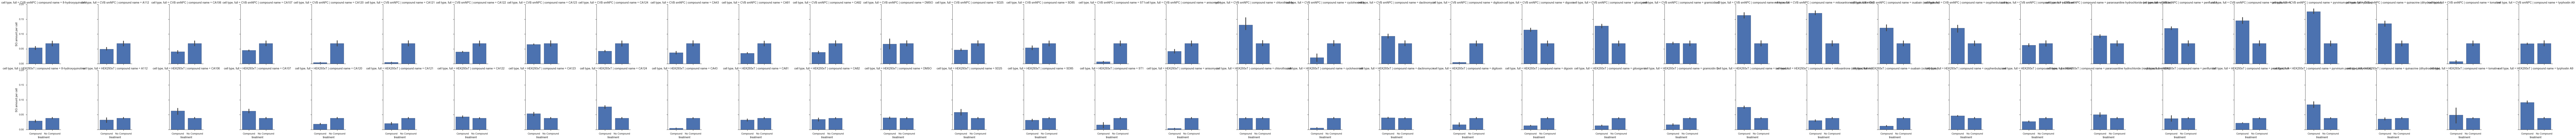

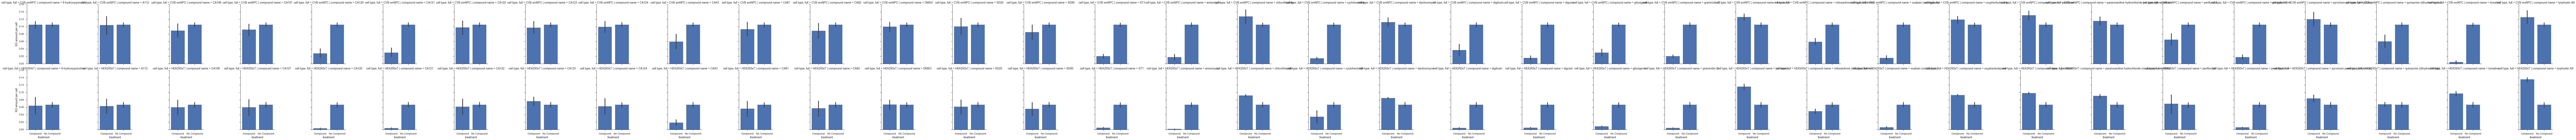

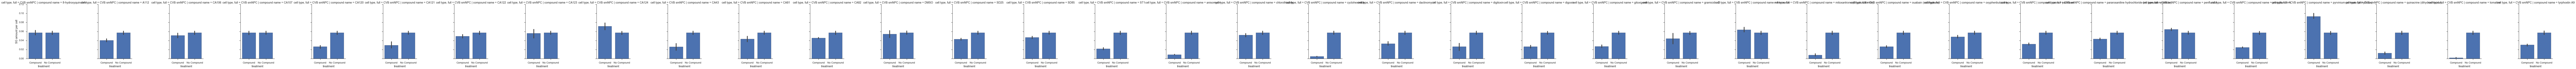

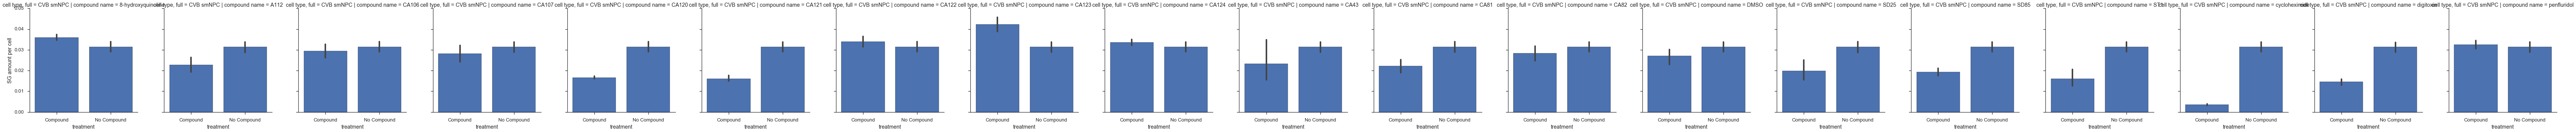

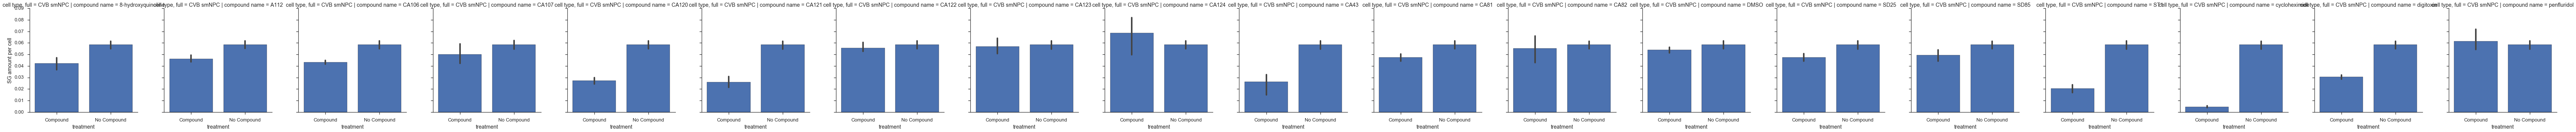

In [40]:
for experiment_metadata, df in dataset_with_no_tx_dupl.groupby(['experiment type, full']):
    #aspect will be used to change the aspect ratio/width of the graphs
    #aspect = len(df.groupby(categories).size())/10.
    
    g = sns.factorplot(x = 'treatment', x_order = ['Compound', 'No Compound'], y = 'SG amount per cell', 
                       col = 'compound name', row = 'cell type, full', kind = 'bar', data = df)

    g.savefig('{}/{}.png'.format(final_analysis_output_folder, experiment_metadata))

In [ ]:
# #calculate the average of all the biological replicates together

# bio_repl_mean = dataset_sortedby_bio_repl.groupby(['cell type', 'experiment type', 'compound name', 'compound concentration uM'])['SG amount per cell'].mean()

# bio_repl_mean

In [ ]:
# bio_repl_mean = bio_repl_mean.to_frame()

# bio_repl_mean = bio_repl_mean.rename(columns = {'SG amount per cell': 'mean SG per cell'})

# bio_repl_mean

In [ ]:
# #calculate the sample standard deviation for each experimental replicate separately

# bio_repl_stdev = dataset_sortedby_bio_repl.groupby(['cell type', 'experiment type', 'compound name', 'compound concentration uM'])['SG amount per cell'].std()

# bio_repl_stdev

In [ ]:
# bio_repl_stdev = bio_repl_stdev.to_frame()

# bio_repl_stdev = bio_repl_stdev.rename(columns = {'SG amount per cell': 'stdev SG per cell'})

# bio_repl_stdev

In [ ]:
# #collect replicate datapoints for each experimental replicate separately

# bio_repl_datapoints = dataset_sortedby_bio_repl.groupby(['cell type', 'experiment type', 'compound name', 'compound concentration uM'])

# bio_repl_collected_datapoints = bio_repl_datapoints['SG amount per cell'].unique()

# bio_repl_collected_datapoints

In [ ]:
# bio_repl_collected_datapoints = bio_repl_collected_datapoints.to_frame()

# bio_repl_collected_datapoints = bio_repl_collected_datapoints.rename(columns = {'SG amount per cell': 'replicate data points'})

# bio_repl_collected_datapoints

In [ ]:
# bio_repl_mean_and_stdev_with_repl_datapoints = bio_repl_mean

# bio_repl_mean_and_stdev_with_repl_datapoints['stdev SG per cell'] = bio_repl_stdev['stdev SG per cell']

# bio_repl_mean_and_stdev_with_repl_datapoints['replicate data points'] = bio_repl_collected_datapoints['replicate data points']

# bio_repl_mean_and_stdev_with_repl_datapoints

In [ ]:
#with open ('{}/151120 biological replicates mean and sd.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    bio_repl_mean_and_stdev.to_csv('{}/151120 biological replicates mean and sd.csv'.format(counterscreen_metadata_folder))


In [ ]:
# with open ('{}/151202 biological replicates mean, sd, and collected replicate datapoints.csv'.format(counterscreen_metadata_folder),'w') as counterscreen_outputfile:
#    bio_repl_mean_and_stdev_with_repl_datapoints.to_csv('{}/151202 biological replicates mean, sd, and collected replicate datapoints.csv'.format(counterscreen_metadata_folder))


In [ ]:
# cell_type_index = bio_repl_mean_and_stdev.index.levels[0]
# experiment_type_index = bio_repl_mean_and_stdev.index.levels[1]
# compound_name_index = bio_repl_mean_and_stdev.index.levels[2]
# compound_concentration_index = bio_repl_mean_and_stdev.index.levels[3]